<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/Pradip_IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

# What is IPL?

It is a shortened format of cricket. At the professional level, it was introduced by the England and Wales Cricket Board (ECB) in 2003 for the inter-county competition. In a Twenty20 game, the two teams have a single innings each, which is restricted to a maximum of 20 overs.

Twenty20 is one of the three current forms of cricket recognised by the International Cricket Council (ICC) as being at the highest international or domestic level.

A typical Twenty20 game is completed in about three hours, with each innings lasting around 90 minutes and an official 10-minute break between the innings. This is much shorter than previous forms of the game, and is closer to the timespan of other popular team sports. It was introduced to create a fast-paced game that would be attractive to spectators at the ground and viewers on television

In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube

Lets, Explore what features the data is containing.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Input file path 
path = '/content/drive/MyDrive/Capstone Project/'
# individual data frame
players_df = pd.read_excel(path + 'Players.xlsx')
deliveries_df = pd.read_csv(path + 'deliveries.csv')
matches_df = pd.read_csv(path + 'matches.csv')
teams_df = pd.read_csv(path + 'teams.csv')
most_runs_average_strikerate_df = pd.read_csv(path + 'most_runs_average_strikerate.csv')
teamwise_home_and_away_df = pd.read_csv(path + 'teamwise_home_and_away.csv')

In [4]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


# Players from different Country

IPL teams have players selected from different countries.

Lets explore players from which countries are included in IPL

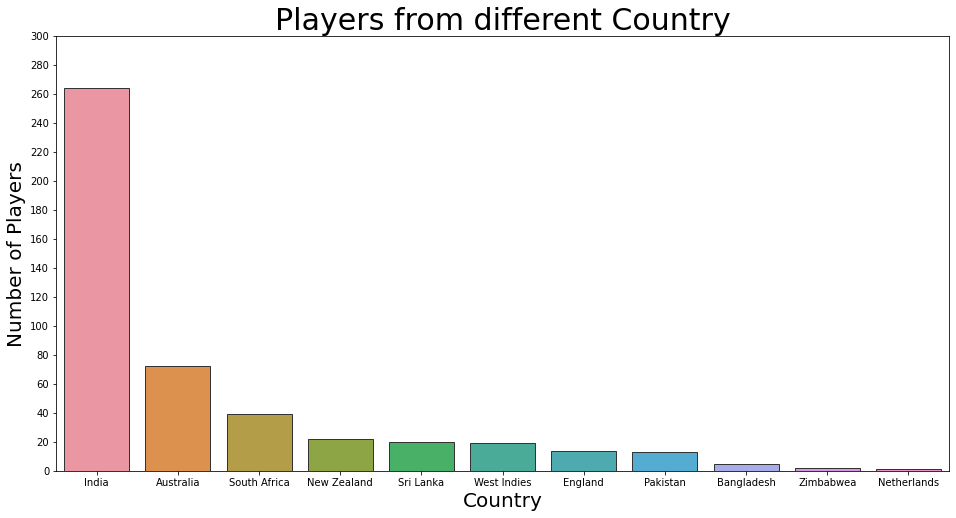

In [5]:
player_country_data = players_df.groupby('Country').count().reset_index()
player_country_data.sort_values('Player_Name', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='Country', y='Player_Name', ax=axes, data=player_country_data,linewidth=1,edgecolor='0.2')
axes.set_yticks(range(0,301,20))
axes.set_xlabel('Country', size=20)
axes.set_ylabel('Number of Players', size=20)
axes.set_title('Players from different Country', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Venue

IPL matches are played on different cities.
Let's see which city have hosted most matches.

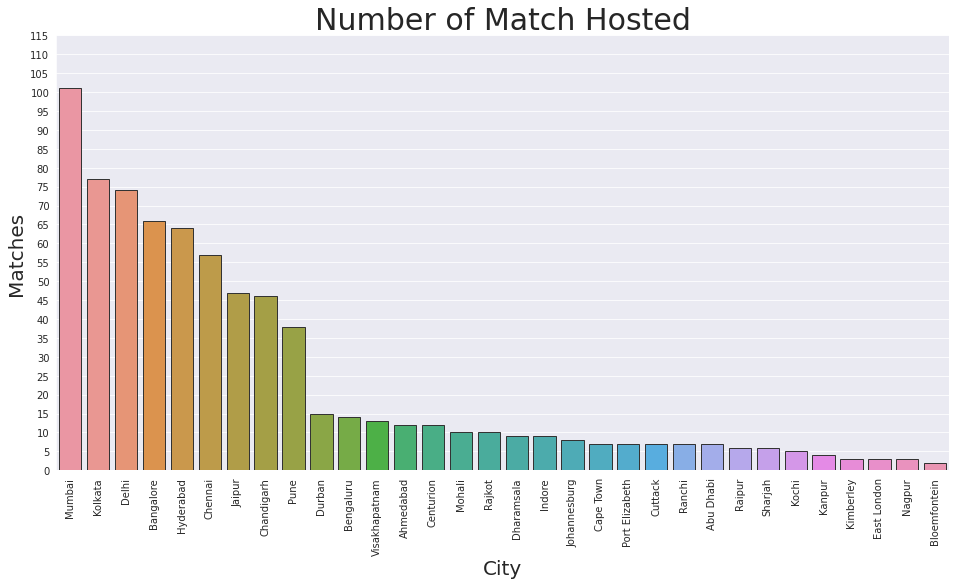

In [7]:
city_data = matches_df.groupby('city').count().reset_index()
city_data.sort_values('id', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='city', y='id', ax=axes, data=city_data,linewidth=1,edgecolor='0.2')
axes.set_yticks(range(0,120,5))
axes.set_xlabel('City', size=20)
axes.set_ylabel('Matches', size=20)
axes.set_title('Number of Match Hosted', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


# Number of matches each season

Let's see on average how many matches a season can have?

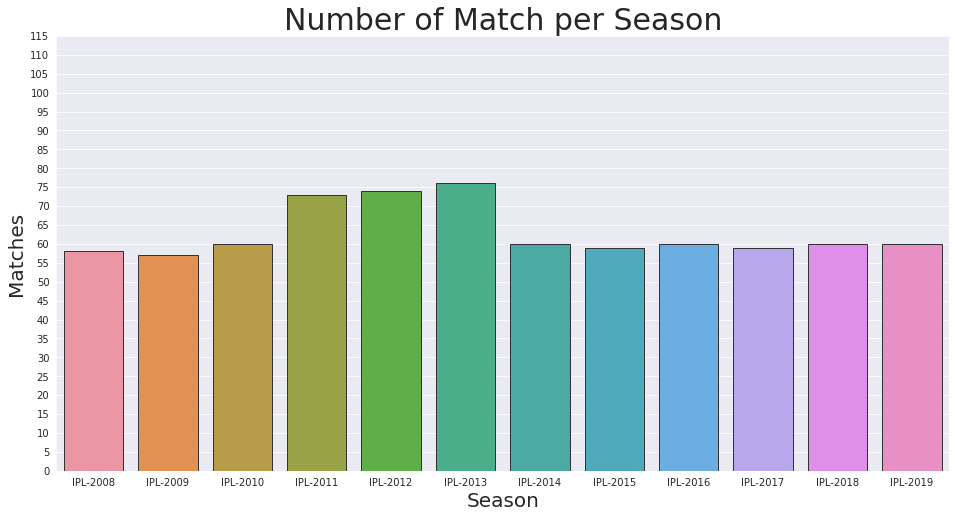

In [8]:
matches_per_season = matches_df.groupby('Season').count().reset_index()
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='Season', y='id', ax=axes, data=matches_per_season, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,120,5))
axes.set_xlabel('Season', size=20)
axes.set_ylabel('Matches', size=20)
axes.set_title('Number of Match per Season', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


In [9]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# Boundries
How many boundries  for each season?

In [10]:
# calculate number of 4's and 6's
# data frames for fours and sixes
fours_df = deliveries_df.loc[(deliveries_df['wide_runs'] == 4) | (deliveries_df['bye_runs'] == 4) | (deliveries_df['legbye_runs'] == 4) | \
                             (deliveries_df['noball_runs'] == 4) | (deliveries_df['penalty_runs'] == 4) | (deliveries_df['batsman_runs'] == 4)]
sixes_df = deliveries_df.loc[(deliveries_df['wide_runs'] == 6) | (deliveries_df['bye_runs'] == 6) | (deliveries_df['legbye_runs'] == 6) | \
                             (deliveries_df['noball_runs'] == 6) | (deliveries_df['penalty_runs'] == 6) | (deliveries_df['batsman_runs'] == 6)]
fours = fours_df.groupby('match_id')['total_runs'].sum().reset_index()
fours['Number of fours'] = fours['total_runs'].apply(lambda x: x//4)
sixes = sixes_df.groupby('match_id')['total_runs'].sum().reset_index()
sixes['Number of sixes'] = sixes['total_runs'].apply(lambda x: x//6)

# function to return total number of fours from given list of match ids
def get_fours(match_ids):
  total_fours = 0
  for id in match_ids:
    match = fours.loc[fours['match_id'] == id]
    total_fours += match.iloc[0]['Number of fours']
  return total_fours

# function to return total number of sixes from given list of match ids
def get_sixes(match_ids):
  total_sixes = 0
  for id in match_ids:
    match = sixes.loc[fours['match_id'] == id]
    total_sixes += match.iloc[0]['Number of sixes']
  return total_sixes

# season dataframe with total number of fours and sixes
seasons_df = matches_df.groupby('Season')['id'].unique().reset_index()
seasons_df['fours'] = seasons_df['id'].apply(lambda x: get_fours(x))
seasons_df['sixes'] = seasons_df['id'].apply(lambda x: get_sixes(x))
seasons_df.drop(columns='id', inplace=True)
seasons_df

,Season,fours,sixes
0,IPL-2008,1737,623
1,IPL-2009,1351,508
2,IPL-2010,1736,587
3,IPL-2011,1957,639
4,IPL-2012,1942,733
5,IPL-2013,2088,681
6,IPL-2014,1597,715
7,IPL-2015,1636,692
8,IPL-2016,1652,639
9,IPL-2017,1632,706


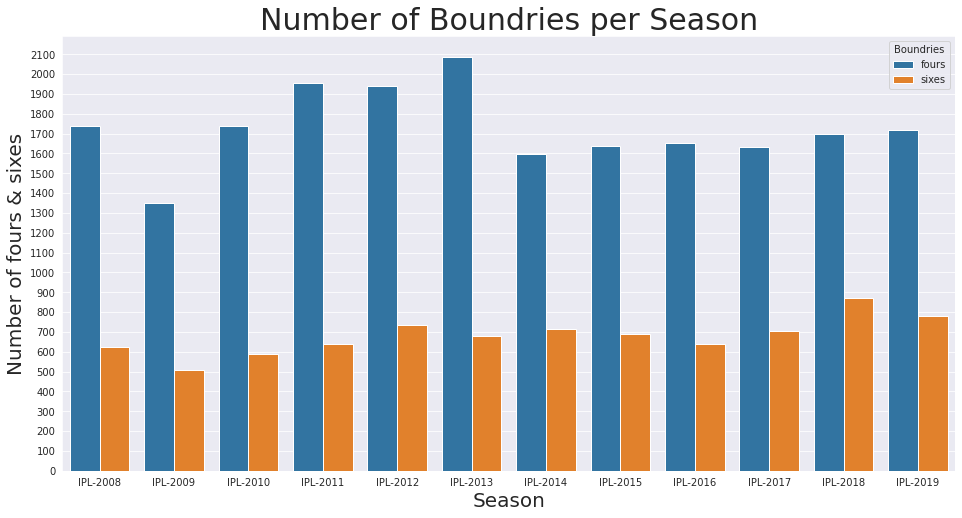

In [11]:
# plot the graph
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
seasons_df = pd.melt(seasons_df, id_vars='Season', var_name='Boundries', value_name='Number of fours & sixes')
sns.barplot(x='Season', y='Number of fours & sixes', hue='Boundries', data=seasons_df, ax=axes)

axes.set_yticks(range(0,2200,100))
axes.set_xlabel('Season', size=20)
axes.set_ylabel('Number of fours & sixes', size=20)
axes.set_title('Number of Boundries per Season', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)


# Player of the match

player of the match award is given to the outstanding player in a particular match. This can be a player from either team, although the player is generally chosen from the winning team. 

Let's see the top 50 players who gets player of the match award most frequantly.

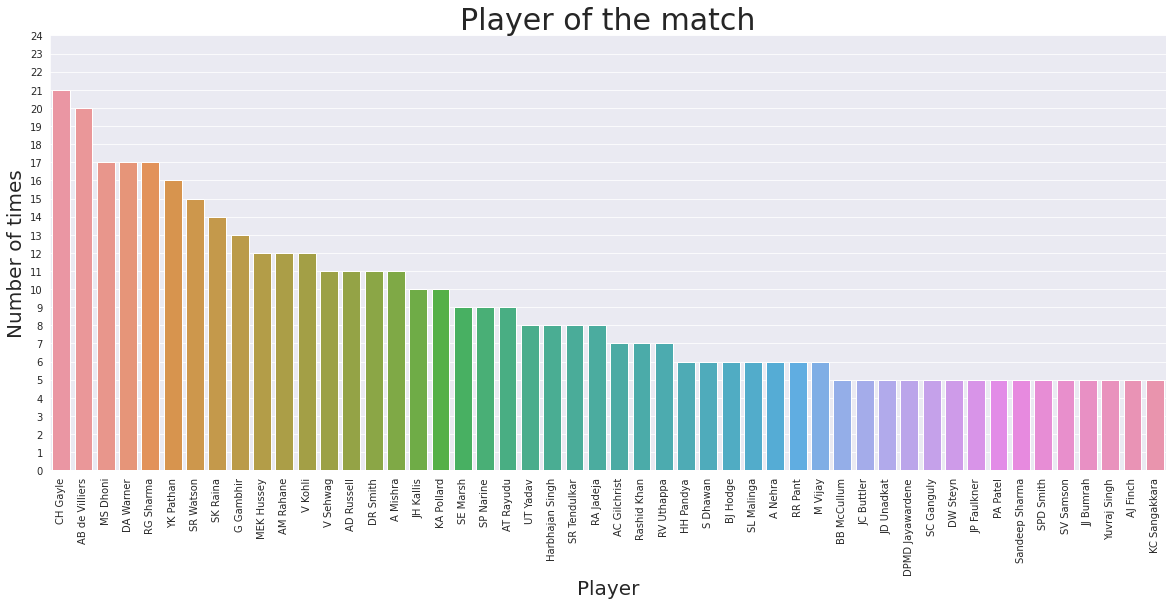

In [12]:
player_of_match_data = matches_df['player_of_match'].value_counts()
player_of_match_data = player_of_match_data[:50]
fig, axes = plt.subplots(figsize=(20,8))
sns.set_style("darkgrid")
sns.barplot(x=player_of_match_data.index, y=player_of_match_data.values,ax=axes)
axes.set_yticks(range(0,25))
axes.set_xlabel('Player', size=20)
axes.set_ylabel('Number of times', size=20)
axes.set_title('Player of the match', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

# Team that win most matches

We offen intrested in finding out which team is best.

By best here we mean the team that win most matches. Let's have visual representation of data.

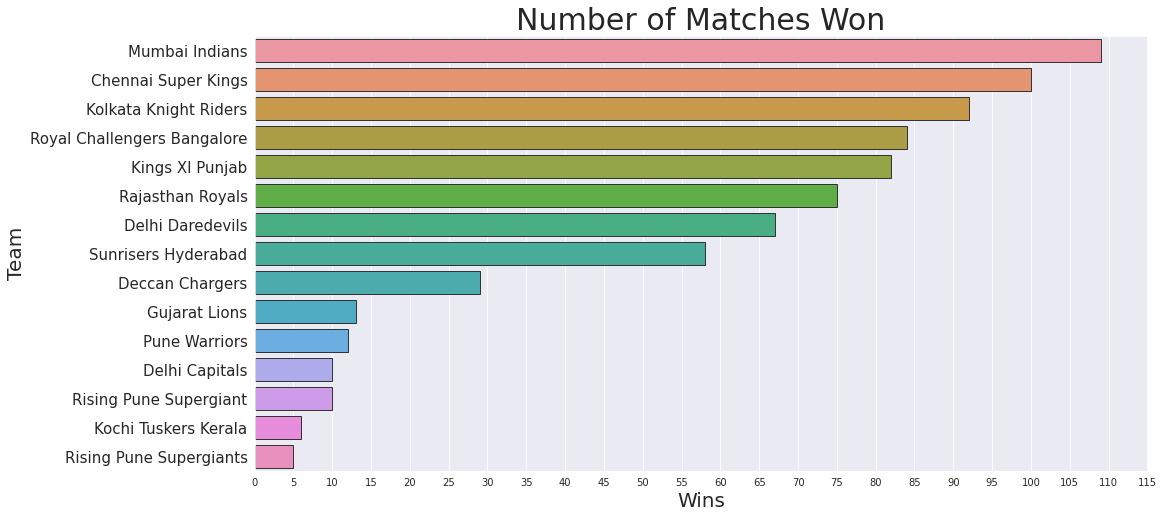

In [13]:
winner_df = matches_df.groupby('winner')['id'].count().reset_index()
winner_df.sort_values('id', ignore_index=True, ascending=False, inplace=True)
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(y='winner', x='id', ax=axes, data=winner_df, linewidth=1, edgecolor='0.2')
axes.set_xticks(range(0,120,5))
axes.set_ylabel('Team', size=20)
axes.set_xlabel('Wins', size=20)
axes.set_title('Number of Matches Won', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

# Toss winning
Does winning  the toss increases chance of winning the game?

In [14]:
# create toss data by merging different dataframes
toss_win_df = matches_df.groupby('toss_winner')['result'].count().reset_index()
toss_win_df.rename(columns={'toss_winner':'team', 'result':'toss won'},inplace=True)
winner_df.rename(columns={'winner':'team', 'id':'match won'},inplace=True)
teams_toss_df = pd.merge(left=toss_win_df, right=winner_df, on='team')
bat_first_df = matches_df[matches_df['toss_decision'] == 'bat'].groupby('toss_winner')['result'].count().reset_index()
bat_first_df.rename(columns={'toss_winner':'team', 'result':'bat first'},inplace=True)
teams_toss_df = pd.merge(left=teams_toss_df, right=bat_first_df, on='team')
field_first_df = matches_df[matches_df['toss_decision'] == 'field'].groupby('toss_winner')['result'].count().reset_index()
field_first_df.rename(columns={'toss_winner':'team', 'result':'field first'},inplace=True)
teams_toss_df = pd.merge(left=teams_toss_df, right=field_first_df, on='team')
teams_toss_df

,team,toss won,match won,bat first,field first
0,Chennai Super Kings,89,100,48,41
1,Deccan Chargers,43,29,24,19
2,Delhi Capitals,10,10,2,8
3,Delhi Daredevils,80,67,29,51
4,Gujarat Lions,15,13,1,14
5,Kings XI Punjab,81,82,26,55
6,Kochi Tuskers Kerala,8,6,3,5
7,Kolkata Knight Riders,92,92,30,62
8,Mumbai Indians,98,109,44,54
9,Pune Warriors,20,12,11,9


Text(0.5, 0.98, 'Toss won to matches won')

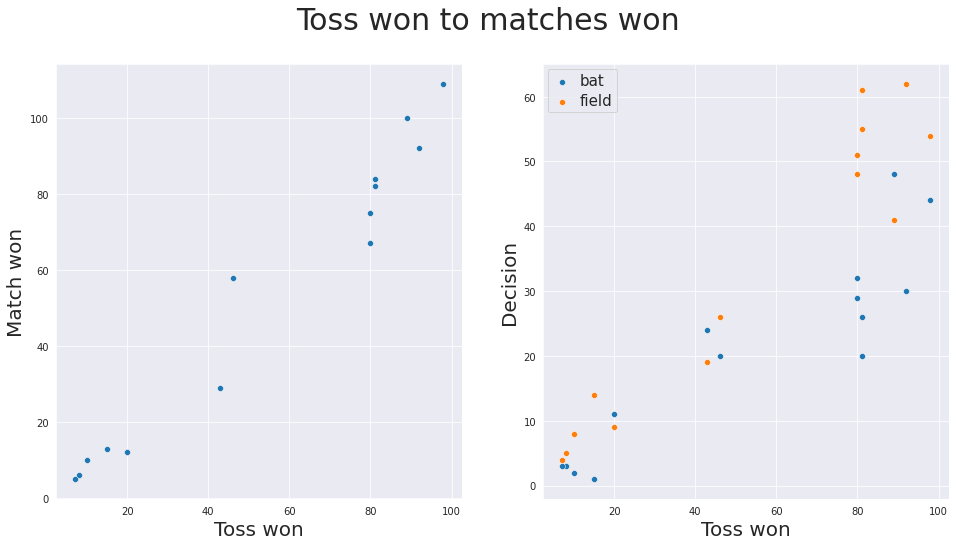

In [15]:
# plot data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
sns.set_style("darkgrid")
sns.scatterplot(x='toss won', y='match won', data=teams_toss_df, ax=axes[0])
axes[0].set_xlabel('Toss won', size=20)
axes[0].set_ylabel('Match won', size=20)
sns.scatterplot(x='toss won', y='bat first', data=teams_toss_df, ax=axes[1])
sns.scatterplot(x='toss won', y='field first', data=teams_toss_df, ax=axes[1])
axes[1].set_xlabel('Toss won', size=20)
axes[1].set_ylabel('Decision', size=20)
axes[1].legend(labels=['bat', 'field'])
plt.setp(axes[1].get_legend().get_texts(), fontsize='15')
fig.suptitle('Toss won to matches won', size=30)

# Centuries

Let's see who scored most centuries in IPL

In [16]:
# function to calculate half centuries
def get_half_centuries(runs):
  runs = runs % 100
  return runs//50

# function to calculate centuries
def get_centuries(runs):
  return runs//100

# calculate half-centuries and centuries for each batsman
batsman_df = deliveries_df.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_df['half_centuries'] = batsman_df['batsman_runs'].apply(lambda x: get_half_centuries(x))
batsman_df['centuries'] = batsman_df['batsman_runs'].apply(lambda x: get_centuries(x))
batsman_df = batsman_df.groupby('batsman').sum().reset_index()
batsman_df

,batsman,match_id,batsman_runs,half_centuries,centuries
0,A Ashish Reddy,10360,280,0,0
1,A Chandila,780,4,0,0
2,A Chopra,607,53,0,0
3,A Choudhary,73,25,0,0
4,A Dananjaya,7902,4,0,0
...,...,...,...,...,...
511,YV Takawale,2973,192,0,0
512,Yashpal Singh,580,47,0,0
513,Younis Khan,97,3,0,0
514,Yuvraj Singh,127529,2765,13,0


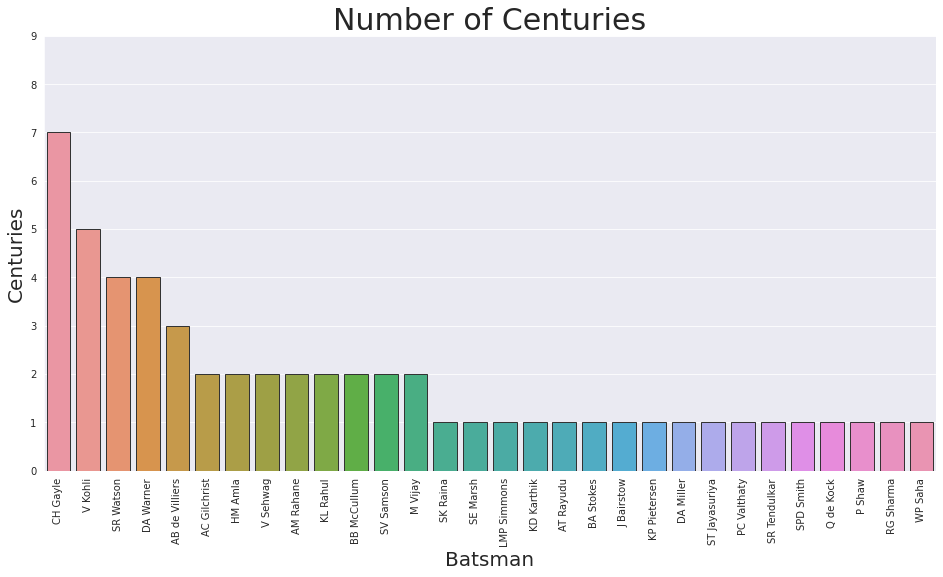

In [18]:
batsman_centuries_df = batsman_df.sort_values('centuries', ascending=False)
batsman_centuries_df = batsman_centuries_df[0:30]
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='batsman', y='centuries', ax=axes, data=batsman_centuries_df, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,10))
axes.set_xlabel('Batsman', size=20)
axes.set_ylabel('Centuries', size=20)
axes.set_title('Number of Centuries', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

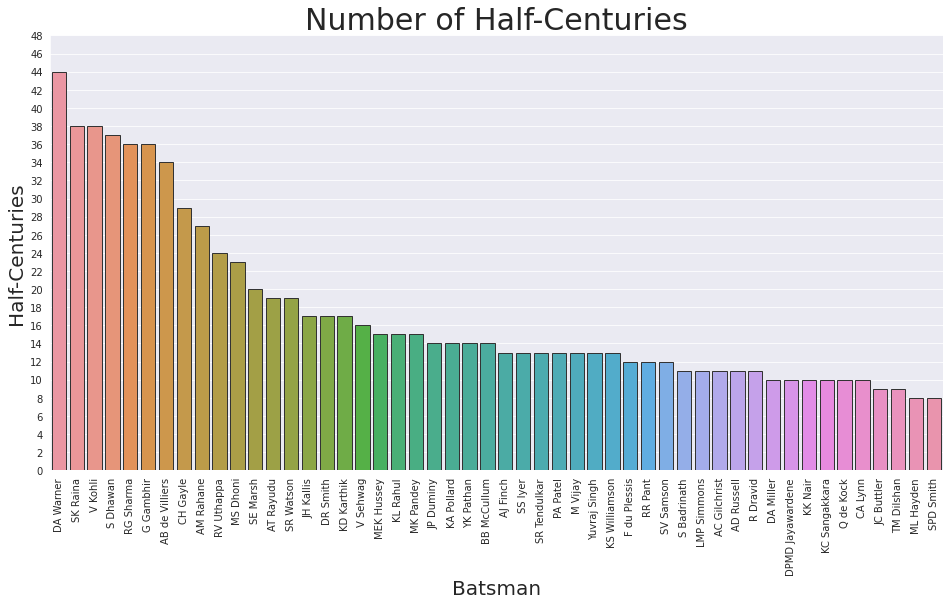

In [19]:
batsman_half_centuries_df = batsman_df.sort_values('half_centuries', ascending=False)
batsman_half_centuries_df = batsman_half_centuries_df[0:50]
fig, axes = plt.subplots(figsize=(16,8))
sns.set_style("darkgrid")
sns.barplot(x='batsman', y='half_centuries', ax=axes, data=batsman_half_centuries_df, linewidth=1, edgecolor='0.2')
axes.set_yticks(range(0,50,2))
axes.set_xlabel('Batsman', size=20)
axes.set_ylabel('Half-Centuries', size=20)
axes.set_title('Number of Half-Centuries', size=30)
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_rotation(90)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)